In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Importing the dataset
# data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech
df = pd.read_csv('twitter (1).csv')
df.sample(5)

,id,label,tweet
23384,23385,0,i am thankful for family vacations. #thankful ...
1281,1282,0,@user come see brooklyn @user &amp; @user hos...
23864,23865,0,"when you feel , on whom you want to show??? ..."
24441,24442,0,last day of high school ð­ð #instamood ...
812,813,0,"teen girl killed, 3 others injured in downtown..."


In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 31962


In [ ]:
df. shape

(31962, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
df['label'].unique()

array([0, 1])

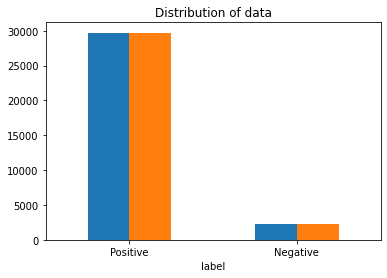

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Positive','Negative'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['label'])

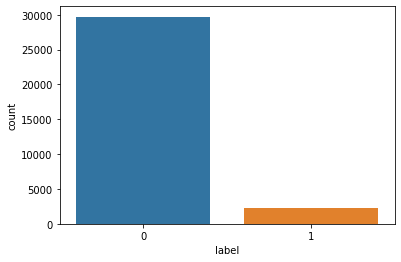

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [ ]:
data=df[['tweet','label']]

In [ ]:
data_pos = data[data['label'] == 0]
data_neg = data[data['label'] == 1]

In [ ]:
data_pos = data_pos.iloc[:int(3000)]
data_neg = data_neg.iloc[:int(3000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])
dataset['tweet']=dataset['tweet'].apply(str)

In [ ]:
dataset['tweet']=dataset['tweet'].str.lower()
dataset['tweet'].tail()

31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['tweet'].head()

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

31934      lady banned kentucky mall user jcpenny kentucky
31946    user omfg im offended im mailbox im proud mail...
31947    user user dont balls hashtag but say weasel aw...
31948       makes ask yourself i anybody god  oh thank god
31960    user sikh temple vandalised calgary wso condem...
Name: tweet, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].tail()

31934      lady banned kentucky mall user jcpenny kentucky
31946    user omfg im offended im mailbox im proud mail...
31947    user user dont balls hashtag but say weasel aw...
31948       makes ask yourself i anybody god  oh thank god
31960    user sikh temple vandalised calgary wso condem...
Name: tweet, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].tail()

31934      lady banned kentucky mall user jcpenny kentucky
31946    user omfg im offended im mailbox im proud mail...
31947    user user dont balls hashtag but say weasel aw...
31948       makes ask yourself i anybody god  oh thank god
31960    user sikh temple vandalised calgary wso condem...
Name: tweet, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].tail()

31934      lady banned kentucky mall user jcpenny kentucky
31946    user omfg im offended im mailbox im proud mail...
31947    user user dont balls hashtag but say weasel aw...
31948       makes ask yourself i anybody god  oh thank god
31960    user sikh temple vandalised calgary wso condem...
Name: tweet, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].tail()

31934    [lady, banned, kentucky, mall, user, jcpenny, ...
31946    [user, omfg, im, offended, im, mailbox, im, pr...
31947    [user, user, dont, balls, hashtag, but, say, w...
31948    [makes, ask, yourself, i, anybody, god, oh, th...
31960    [user, sikh, temple, vandalised, calgary, wso,...
Name: tweet, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_text(x))
dataset['tweet'].tail()

31934    [lady, banned, kentucky, mall, user, jcpenny, ...
31946    [user, omfg, im, offended, im, mailbox, im, pr...
31947    [user, user, dont, balls, hashtag, but, say, w...
31948    [makes, ask, yourself, i, anybody, god, oh, th...
31960    [user, sikh, temple, vandalised, calgary, wso,...
Name: tweet, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
  
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].tail()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


31934    [lady, banned, kentucky, mall, user, jcpenny, ...
31946    [user, omfg, im, offended, im, mailbox, im, pr...
31947    [user, user, dont, balls, hashtag, but, say, w...
31948    [makes, ask, yourself, i, anybody, god, oh, th...
31960    [user, sikh, temple, vandalised, calgary, wso,...
Name: tweet, dtype: object

In [ ]:
X=data.tweet
y=data.label

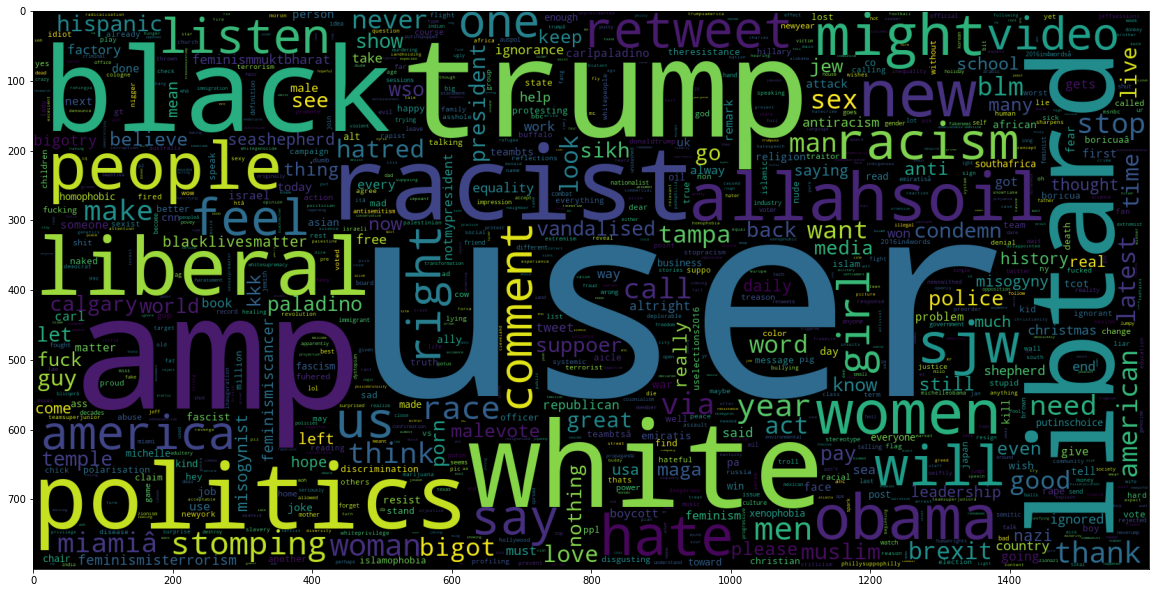

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg['tweet']))
plt.imshow(wc)

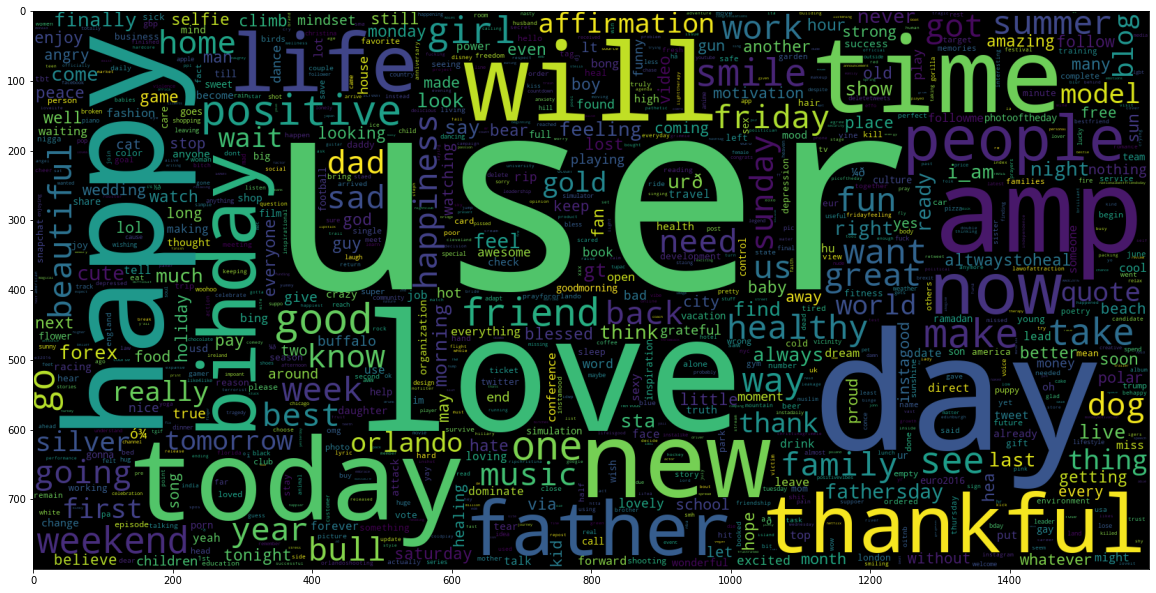

In [ ]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos['tweet']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  210207


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2971
           1       0.00      0.00      0.00       226

    accuracy                           0.93      3197
   macro avg       0.46      0.50      0.48      3197
weighted avg       0.86      0.93      0.90      3197



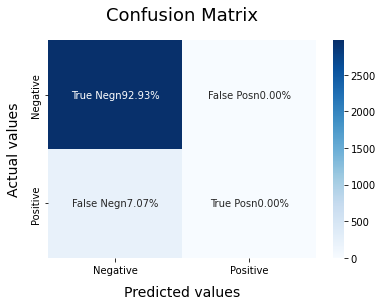

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2971
           1       0.89      0.57      0.69       226

    accuracy                           0.96      3197
   macro avg       0.93      0.78      0.84      3197
weighted avg       0.96      0.96      0.96      3197



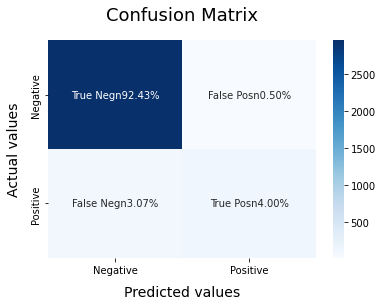

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2971
           1       0.92      0.31      0.46       226

    accuracy                           0.95      3197
   macro avg       0.94      0.65      0.72      3197
weighted avg       0.95      0.95      0.94      3197



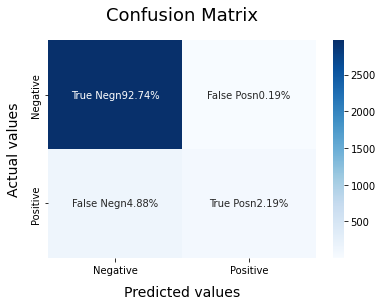

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)